In [3]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [1]:
%pip install textblob
%pip install wordcloud
%pip install tweepy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [4]:
consumerKey = 'XpwCpsjeXRKMImORrfnMkR7YE'
consumerSecret = 'puiGr3ts6TCaRgo8yrBgNXC6NBhUynRPZdwsShtbBcu8YAm4jY'
accessToken = '992426210595688448-6XZeXmJV9aLFY8y1kN0fRRB2a5kOIHG'
accessTokenSecret = '3wpmZT7I7cta9RsukyHYLfssduDY7qbMOALTLfCJDxrxf'


In [5]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret)

# Creating the API object while passing in auth information
api = tweepy.API(authenticate, wait_on_rate_limit=True)


In [9]:
# Extract 100 tweets from the twitter user
posts = api.home_timeline(screen_name="ArvindKejriwal",
                          count=100, lang="en", tweet_mode="extended")

#  Print the last 5 tweets
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

Unexpected parameter: screen_name
Unexpected parameter: lang


Show the 5 recent tweets:

1) To be super clear, we have not yet made any changes to Twitter’s content moderation policies https://t.co/k4guTsXOIu

2) Ligma Johnson had it coming 🍆 💦 https://t.co/CgjrOV5eM2

3) Comedy is now legal on Twitter

4) RT @Tesla: Solar + Powerwall ensures you never lose power, even if the grid goes down

🎥 @jeremyjudkins_ https://t.co/rZXpyTtnmb

5) Twitter will be forming a content moderation council with widely diverse viewpoints. 

No major content decisions or account reinstatements will happen before that council convenes.



In [7]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 5 rows of data
df.head()


,Tweets
0,"To be super clear, we have not yet made any ch..."
1,Ligma Johnson had it coming 🍆 💦 https://t.co/C...
2,Comedy is now legal on Twitter
3,RT @Tesla: Solar + Powerwall ensures you never...
4,Twitter will be forming a content moderation c...


In [10]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text)  # Removing @mentions
 text = re.sub('#', '', text)  # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text)  # Removing RT
 text = re.sub('https?:\/\/\S+', '', text)  # Removing hyperlink

 return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df


,Tweets
0,"To be super clear, we have not yet made any ch..."
1,Ligma Johnson had it coming 🍆 💦
2,Comedy is now legal on Twitter
3,: Solar + Powerwall ensures you never lose pow...
4,Twitter will be forming a content moderation c...
...,...
95,
96,Unscramble and stand a chance to win the OnePl...
97,Hurry! The AmazonGreatIndianFestival is ending...
98,Upgrade your home to a smart home this Diwali ...


In [11]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity


def getPolarity(text):
   return TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df


,Tweets,Subjectivity,Polarity
0,"To be super clear, we have not yet made any ch...",0.525000,0.216667
1,Ligma Johnson had it coming 🍆 💦,0.000000,0.000000
2,Comedy is now legal on Twitter,0.200000,0.200000
3,: Solar + Powerwall ensures you never lose pow...,0.288889,-0.155556
4,Twitter will be forming a content moderation c...,0.450000,-0.065625
...,...,...,...
95,,0.000000,0.000000
96,Unscramble and stand a chance to win the OnePl...,0.575000,0.650000
97,Hurry! The AmazonGreatIndianFestival is ending...,0.277778,0.450000
98,Upgrade your home to a smart home this Diwali ...,0.771429,0.407143


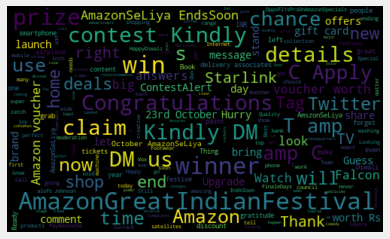

In [12]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21,
                      max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()


In [13]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'


df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df


,Tweets,Subjectivity,Polarity,Analysis
0,"To be super clear, we have not yet made any ch...",0.525000,0.216667,Positive
1,Ligma Johnson had it coming 🍆 💦,0.000000,0.000000,Neutral
2,Comedy is now legal on Twitter,0.200000,0.200000,Positive
3,: Solar + Powerwall ensures you never lose pow...,0.288889,-0.155556,Negative
4,Twitter will be forming a content moderation c...,0.450000,-0.065625,Negative
...,...,...,...,...
95,,0.000000,0.000000,Neutral
96,Unscramble and stand a chance to win the OnePl...,0.575000,0.650000,Positive
97,Hurry! The AmazonGreatIndianFestival is ending...,0.277778,0.450000,Positive
98,Upgrade your home to a smart home this Diwali ...,0.771429,0.407143,Positive


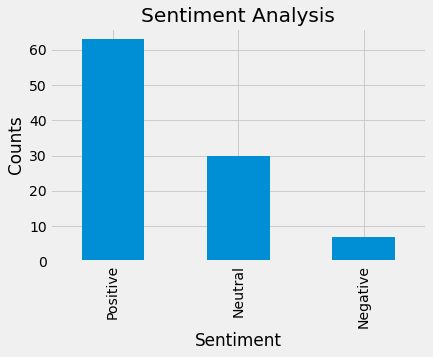

In [14]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()
